In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn import metrics
import seaborn as sn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [26]:
TRAIN_PATH = 'C:\\Users\\mychu\\Workspace\\ML_Paper\\data\\train.csv'
TEST_PATH = 'C:\\Users\\mychu\\Workspace\\ML_Paper\\data\\test.csv'
TEST_TARGET_PATH = 'C:\\Users\\mychu\\Workspace\\ML_Paper\\data\\testtarget.csv'

df = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH) # hedef sütunu içermiyor
df_correct = pd.read_csv(TEST_TARGET_PATH)

In [27]:
le = preprocessing.LabelEncoder()

In [28]:
# TRAIN

In [29]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical = df_categorical.fillna("none")
for column in df_categorical:
    df_categorical[column] = le.fit_transform(df_categorical[column])

In [30]:
df_numerical = df.select_dtypes(include=['int64','float64'])

for column in df_numerical:
    df_numerical[column] = df_numerical[column].fillna(df_numerical[column].mean())

df_new = df_categorical.join(df_numerical)

c:\users\mychu\workspace\ml_paper\ml_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
# TEST

In [32]:
df_test_categorical = df_test.select_dtypes(include=['object'])

df_test_categorical = df_test_categorical.fillna("none")

for column in df_test_categorical:
    df_test_categorical[column] = le.fit_transform(df_test_categorical[column])

In [33]:
df_test_numerical = df_test.select_dtypes(include=['int64','float64'])

for column in df_test_numerical:
    df_test_numerical[column] = df_test_numerical[column].fillna(df_test_numerical[column].mean())

df_test_new = df_test_categorical.join(df_test_numerical)

c:\users\mychu\workspace\ml_paper\ml_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
corr = df.corr()
high_correlated_columns = corr[abs(corr["SalePrice"])>0.2].index
high_correlated_columns = high_correlated_columns.drop("SalePrice")

<AxesSubplot:>

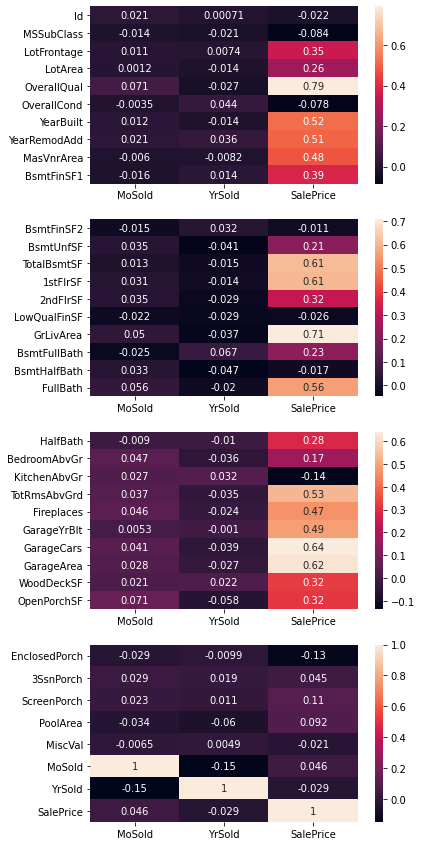

In [35]:
fig = plt.figure(figsize = (6,15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sn.heatmap(corr.iloc[:10,35:38]  , annot=True, ax=ax1)
sn.heatmap(corr.iloc[10:20,35:38], annot=True, ax=ax2)
sn.heatmap(corr.iloc[20:30,35:38], annot=True, ax=ax3)
sn.heatmap(corr.iloc[30:38,35:38], annot=True, ax=ax4)

Hedef öznitelik veriden ayrıştırılır ve Y olarak saklanır. Geri kalan özniteikler "MinMaxScaler" kullanılarak
normalize edilir. Normalize edilmiş öznitelik değerleri X olarak saklanır.

In [36]:
x_train = df_new[high_correlated_columns].values
x_test = df_test_new[high_correlated_columns].values

In [37]:
y_test = df_correct["SalePrice"]
y_train = df["SalePrice"]

In [38]:
y_train_max = max(y_train.values)
y_train_min = min(y_train.values)
y_train = (y_train-y_train_min)/(y_train_max-y_train_min)

In [39]:
y_test_max = max(y_test.values)
y_test_min = min(y_test.values)
y_test = (y_test-y_test_min)/(y_test_max-y_test_min)

In [40]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

In [41]:
neigh = KNeighborsRegressor(n_neighbors=3,p=2)
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
from sklearn import metrics

In [43]:
y_pred = np.array(neigh.predict(x_train))

metrics.r2_score(y_train,y_pred)

0.8871837854846154

In [44]:
y_pred = np.array(neigh.predict(x_test))
metrics.r2_score(y_test,y_pred)

0.16353704140018488

In [45]:
np.std(y_train)

np.std(y_test)

full = np.concatenate((y_train,y_test))

std_dev = np.std(full)

In [46]:
y_train = np.array([int((x/(std_dev*2))) for x in y_train])
y_test = np.array([int((x/(std_dev*2))) for x in y_test])

In [47]:
neigh = KNeighborsClassifier(n_neighbors=7,p=2)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
#Training Data

In [49]:
y_pred = np.array(neigh.predict(x_train))

In [50]:
conf_matrix = confusion_matrix(y_train,y_pred)
print(conf_matrix)
print("Total Accuracy---------------------------------")



conf_vals = []
for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i,i]
    FP = conf_matrix[i,:].sum() - TP
    FN = conf_matrix[:,i].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    conf_vals.append([TP,FP,FN,TN])
conf_vals = np.array(conf_vals)

# Total Accuracy = (TP + TN)/(TP + TN + FP + FN)
acc = (y_train == y_pred).sum()/y_train.shape[0]
print(f"Accuracy:{acc}")
print("Accuracy---------------------------------")





# Accuracy = (TP + TN)/(TP + TN + FP + FN)
for i in range(conf_matrix.shape[0]):
    s = (conf_vals[i,0] + conf_vals[i,3]) / conf_vals[i,:].sum()
    print(f"Sınıf{i} = {s}")
    
    
    
    


print("Sensitivity------------------------------------")
# Sensitivity = TP / TP + FN
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,2])
    if not (np.isnan(s)):
        sm += s
        
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FN({conf_vals[i,2]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}")   






print("Specificity-----------------------------------")
# Specificity = TN / TN + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,3] / (conf_vals[i,3] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TN({conf_vals[i,3]}) / (TN({conf_vals[i,3]})+FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 




print("Precision-----------------------------------")
##### Precision = TP / TP + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 

[[1092   26    0    2]
 [  80  235    0    0]
 [   0   19    2    0]
 [   0    2    2    0]]
Total Accuracy---------------------------------
Accuracy:0.9102739726027397
Accuracy---------------------------------
Sınıf0 = 0.9260273972602739
Sınıf1 = 0.913013698630137
Sınıf2 = 0.9856164383561644
Sınıf3 = 0.9958904109589041
Sensitivity------------------------------------
Sınıf0 = TP(1092) / (TP(1092) + FN(80)) = 0.931740614334471
Sınıf1 = TP(235) / (TP(235) + FN(47)) = 0.8333333333333334
Sınıf2 = TP(2) / (TP(2) + FN(2)) = 0.5
Sınıf3 = TP(0) / (TP(0) + FN(2)) = 0.0
avg = 0.5662684869169511
Specificity-----------------------------------
Sınıf0 = TN(260) / (TN(260)+FP(28)) = 0.9027777777777778
Sınıf1 = TN(1098) / (TN(1098)+FP(80)) = 0.9320882852292021
Sınıf2 = TN(1437) / (TN(1437)+FP(19)) = 0.9869505494505495
Sınıf3 = TN(1454) / (TN(1454)+FP(4)) = 0.9972565157750343
avg = 0.9547682820581409
Precision-----------------------------------
Sınıf0 = TP(1092) / (TP(1092) + FP(28)) = 0.975
Sınıf1 = T

In [51]:
#Test Data

In [52]:
y_pred = np.array(neigh.predict(x_test))

In [53]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print("Total Accuracy---------------------------------")



conf_vals = []
for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i,i]
    FP = conf_matrix[i,:].sum() - TP
    FN = conf_matrix[:,i].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    conf_vals.append([TP,FP,FN,TN])
conf_vals = np.array(conf_vals)

# Total Accuracy = (TP + TN)/(TP + TN + FP + FN)
acc = (y_test == y_pred).sum()/y_test.shape[0]
print(f"Accuracy:{acc}")
print("Accuracy---------------------------------")





# Accuracy = (TP + TN)/(TP + TN + FP + FN)
for i in range(conf_matrix.shape[0]):
    s = (conf_vals[i,0] + conf_vals[i,3]) / conf_vals[i,:].sum()
    print(f"Sınıf{i} = {s}")
    
    
    
    


print("Sensitivity------------------------------------")
# Sensitivity = TP / TP + FN
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,2])
    if not (np.isnan(s)):
        sm += s
        
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FN({conf_vals[i,2]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}")   






print("Specificity-----------------------------------")
# Specificity = TN / TN + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,3] / (conf_vals[i,3] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TN({conf_vals[i,3]}) / (TN({conf_vals[i,3]})+FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 




print("Precision-----------------------------------")
##### Precision = TP / TP + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 

[[800   0   0   0]
 [443 127   0   0]
 [  2  76   0   0]
 [  0  11   0   0]]
Total Accuracy---------------------------------
Accuracy:0.6353666895133653
Accuracy---------------------------------
Sınıf0 = 0.6949965729952022
Sınıf1 = 0.636737491432488
Sınıf2 = 0.9465387251542152
Sınıf3 = 0.9924605894448252
Sensitivity------------------------------------
Sınıf0 = TP(800) / (TP(800) + FN(445)) = 0.642570281124498
Sınıf1 = TP(127) / (TP(127) + FN(87)) = 0.5934579439252337
Sınıf2 = TP(0) / (TP(0) + FN(0)) = nan
Sınıf3 = TP(0) / (TP(0) + FN(0)) = nan
avg = 0.3090070562624329
Specificity-----------------------------------
Sınıf0 = TN(214) / (TN(214)+FP(0)) = 1.0
Sınıf1 = TN(802) / (TN(802)+FP(443)) = 0.6441767068273092
Sınıf2 = TN(1381) / (TN(1381)+FP(78)) = 0.9465387251542152
Sınıf3 = TN(1448) / (TN(1448)+FP(11)) = 0.9924605894448252
avg = 0.8957940053565875
Precision-----------------------------------
Sınıf0 = TP(800) / (TP(800) + FP(0)) = 1.0
Sınıf1 = TP(127) / (TP(127) + FP(443)) = 0.22280

c:\users\mychu\workspace\ml_paper\ml_env\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in longlong_scalars
